In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path= 'Fruits_Vegetables/validation'

In [4]:
img_width = 180
img_hight = 180

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_hight),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_hight),
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_hight),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


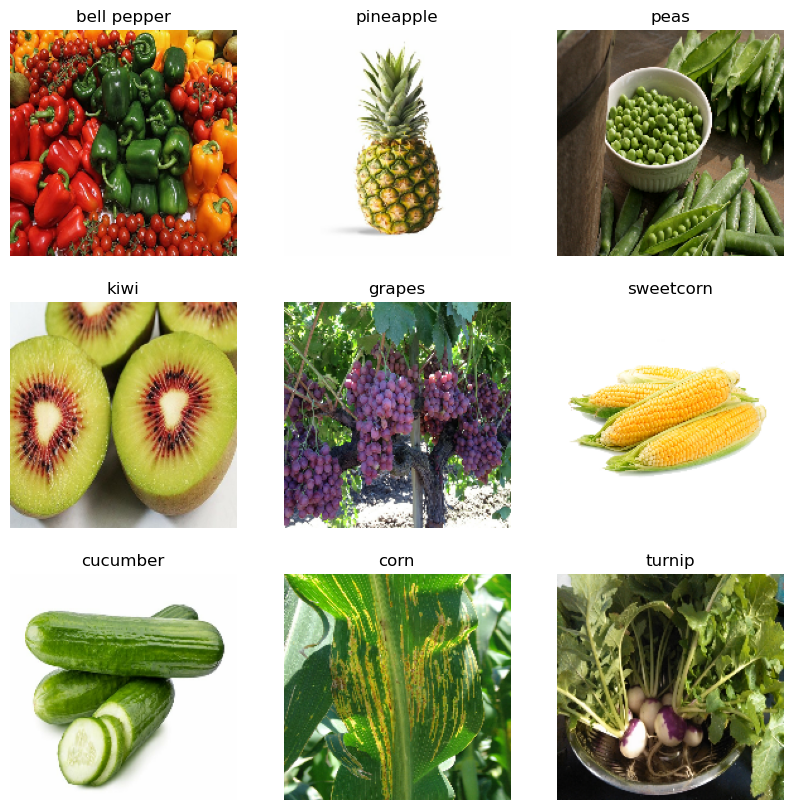

In [9]:
plt.figure(figsize=(10,10))
for image , labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units = len(data_cat)),
])

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
epochs = 25
history = model.fit(data_train,validation_data=data_val,epochs=epochs,batch_size=32,verbose=1)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 845ms/step - accuracy: 0.1056 - loss: 3.3538 - val_accuracy: 0.2422 - val_loss: 2.5635
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 736ms/step - accuracy: 0.2848 - loss: 2.4834 - val_accuracy: 0.4758 - val_loss: 1.7788
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 745ms/step - accuracy: 0.4709 - loss: 1.8662 - val_accuracy: 0.7094 - val_loss: 1.0502
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 772ms/step - accuracy: 0.6379 - loss: 1.2651 - val_accuracy: 0.8832 - val_loss: 0.6037
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 759ms/step - accuracy: 0.7865 - loss: 0.7622 - val_accuracy: 0.9259 - val_loss: 0.4982
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 786ms/step - accuracy: 0.8703 - loss: 0.4582 - val_accuracy: 0.9288 - val_loss: 0.5219
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 712ms/step - accuracy: 0.9108 - loss: 0.3512 - val_accuracy: 0.9487 - val_loss: 0.3492
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 570ms/step - accuracy: 0.9554 - loss: 0.1964 - val_accu

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,979,854 (45.70 MB)

 Trainable params: 3,993,284 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,986,570 (30.47 MB)

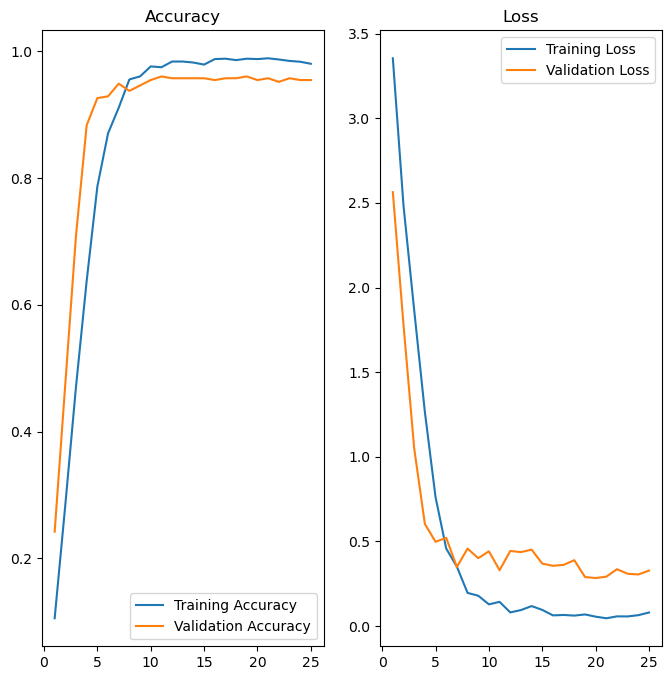

In [15]:
epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8,8))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [16]:
image = '111.jpg'
image = tf.keras.utils.load_img(image,target_size=(img_hight,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [17]:
predcit = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


In [18]:
score = tf.nn.softmax(predcit)

In [19]:
print('Veg/fruit in the image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))


Veg/fruit in the image is pineapple with accuracy of 99.99


In [23]:
model.save('furits_data.h5')

In [22]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']